<div style="color:white;
           display:fill;
           border-radius:25px;
           background-color:Brown;
           font-size:210%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          text-align:center;"
          >
       WELCOME TO MY NOTEBOOK
</p>
</div>

<div style="color:white;
           display:fill;
           border-radius:25px;
           background-color:green;
           font-size:160%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          text-align:left;"
          >
      About Dataset: Water Quality and Potability
</p>
</div>

![](https://i.gifer.com/embedded/download/YVcy.gif)

> This dataset contains total 10 Columns, the first 9 columns are used as a input features,namely, PH value, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic Carbon, Trihalomethanes,Turbidity. In this dataset our main goal is to predict the water potability with values 1 (potable) and 0 (not potable).

> Thank you for exploring my notebook, and,  I would really appreciate your support through an upvote😊

# Import all the Necessary Libraries 

In [44]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report


import warnings 
warnings.filterwarnings("ignore")

In [45]:
# Read the dataset
dataframe=pd.read_csv("./water_potability.csv")
dataframe.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [46]:
# check the shape of the dataset
dataframe.shape

(3276, 10)

In [47]:
# To Check Is there any null values in the dataset
dataframe.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

> Here we can see that there are lot of missing values in the dataset pertaining to the columns ph, sulphate and Trihalomethanes.

In [48]:
# To check Is there any duplicate value in the dataset
dataframe.duplicated().sum()

0

> There is no duplicate value in the dataset

In [49]:
# Lets describe the dataset
dataframe.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [50]:
# Lets make the correlation matrix
dataframe.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


# Lets visualise the correlation matrix

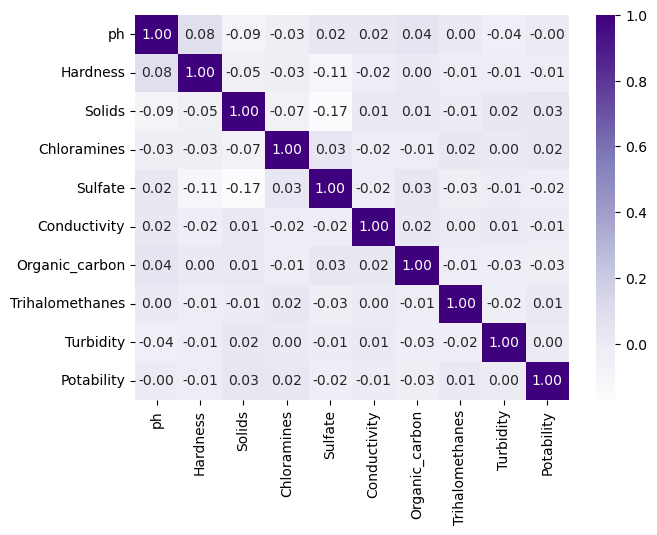

In [51]:
plt.figure(figsize=(7,5))
sns.heatmap(dataframe.corr(), annot=True, cmap="Purples", fmt=".2f")
plt.show()

# Exploratory Data Analysis

> # Univariate Analysis

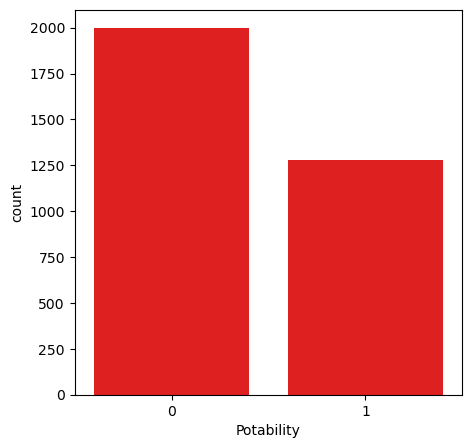

In [52]:
# Lets visualise the data distribution of  target variable
plt.figure(figsize=(5,5))
sns.countplot(data=dataframe, x=dataframe["Potability"], color="red")
plt.show()

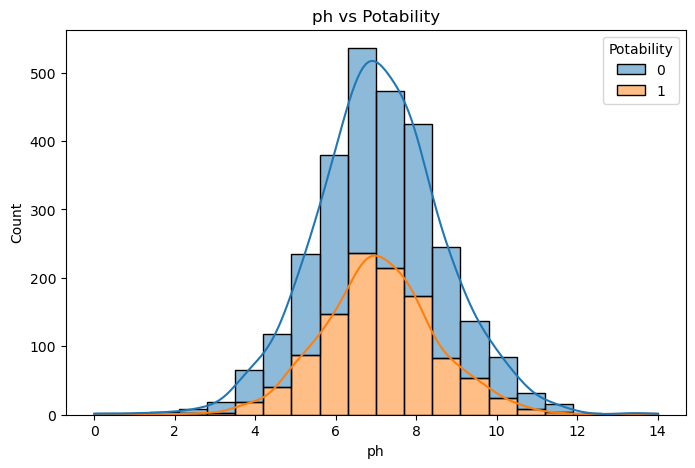

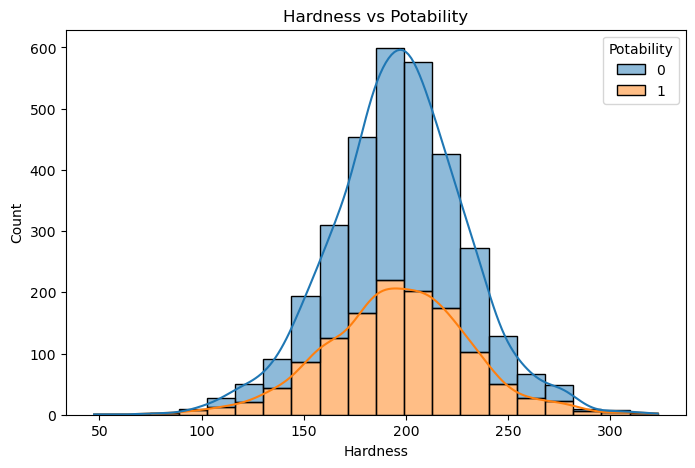

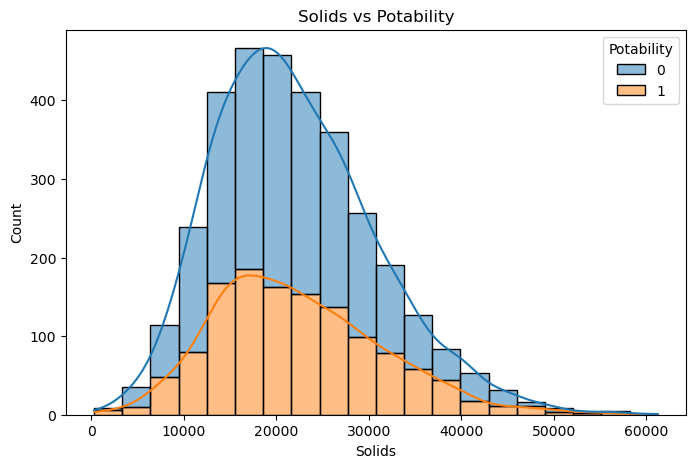

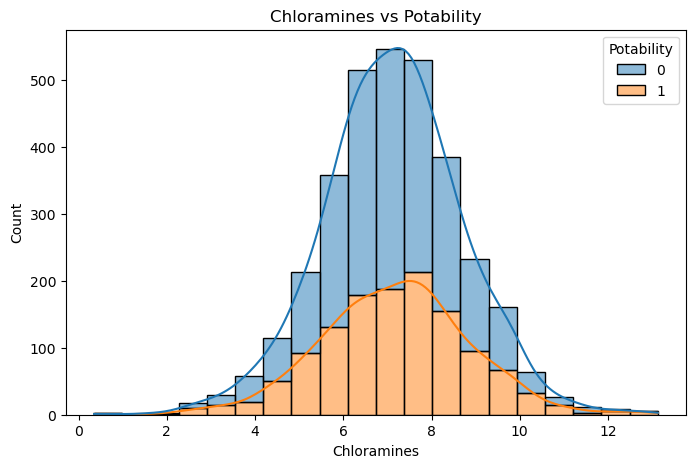

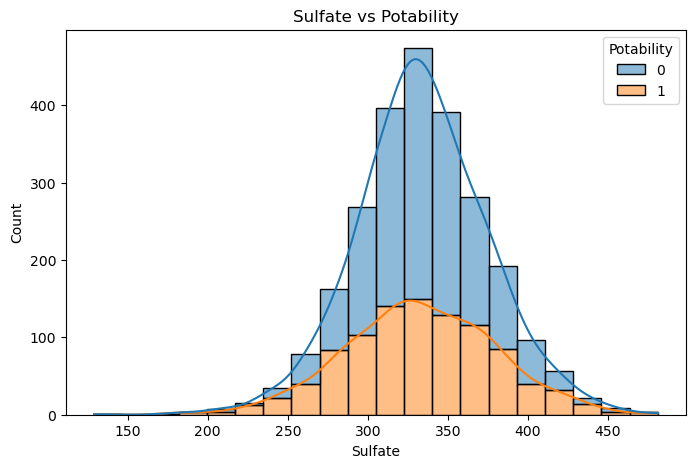

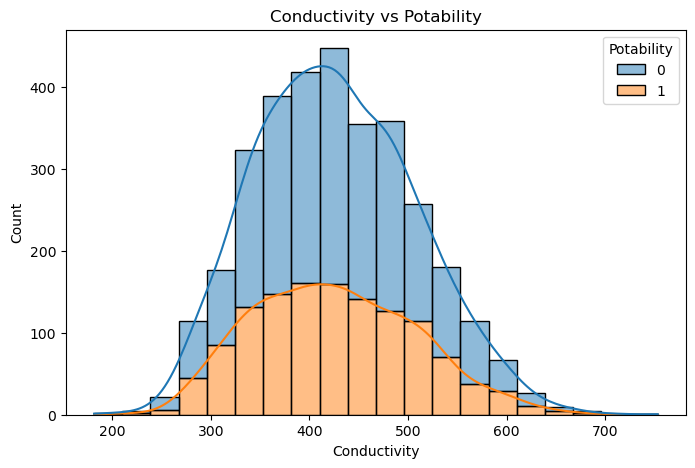

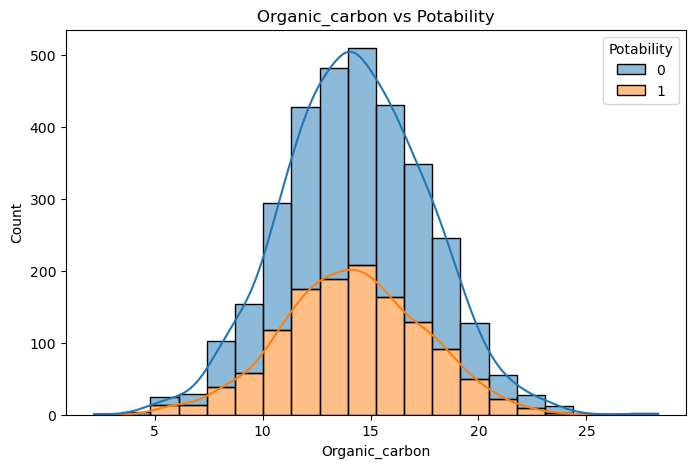

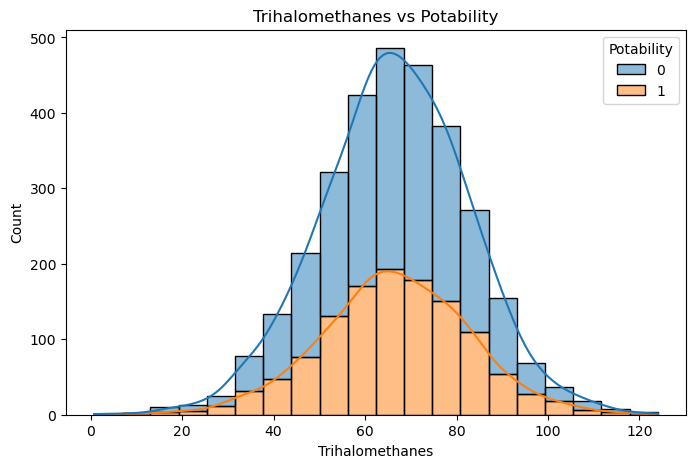

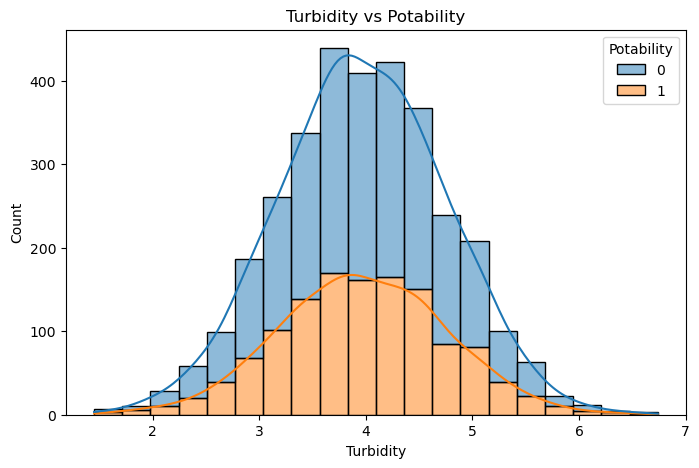

In [53]:
# Lets visualise the distribution of the numerical value with respect to Potability(target variable)
columns=dataframe.select_dtypes(exclude="object").columns
for i in range(len(columns)-1):
    plt.figure(figsize=(8,5))
    sns.histplot(data=dataframe, x=dataframe[columns[i]], hue="Potability", kde=True, color="red", multiple="stack", bins=20)
    plt.title(f"{columns[i]} vs Potability")
    plt.show()

> # Bivariate Analysis

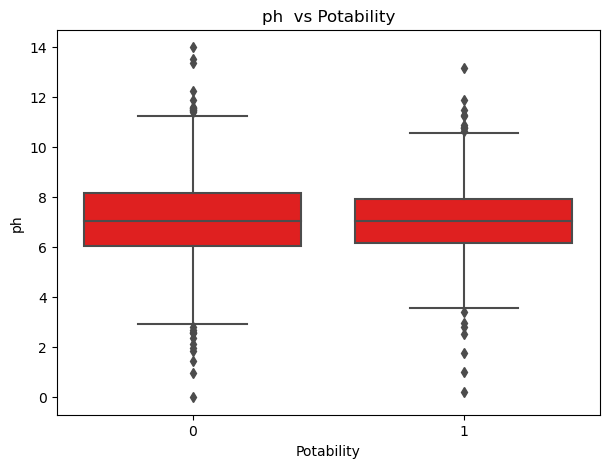

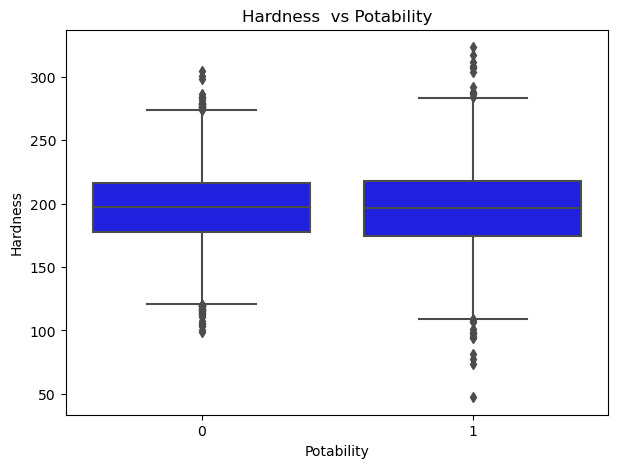

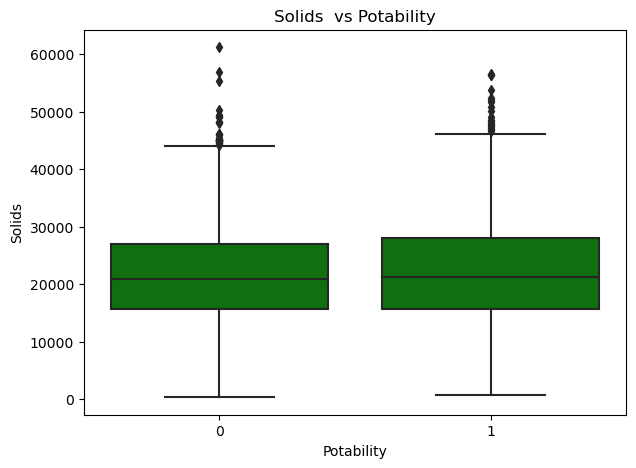

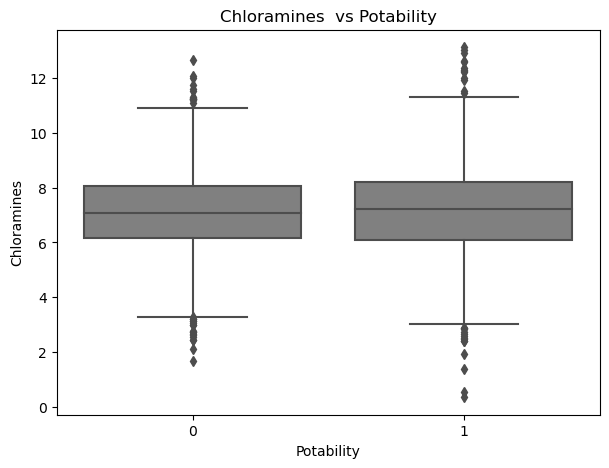

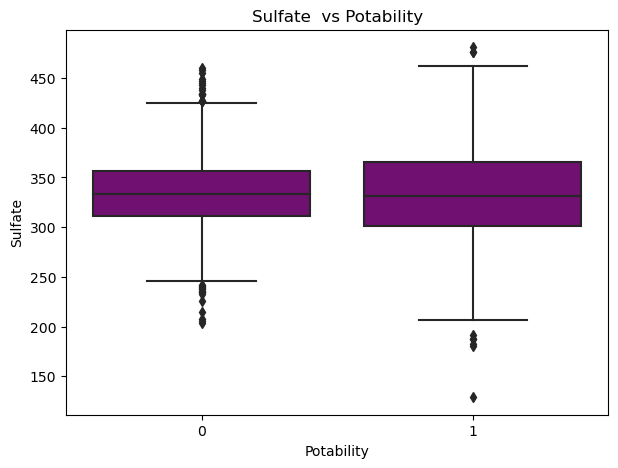

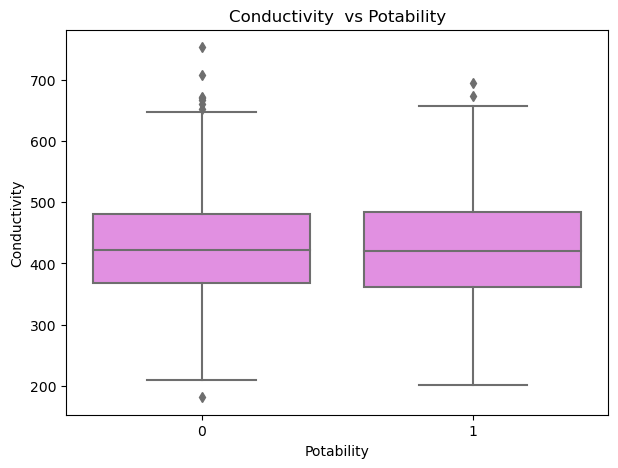

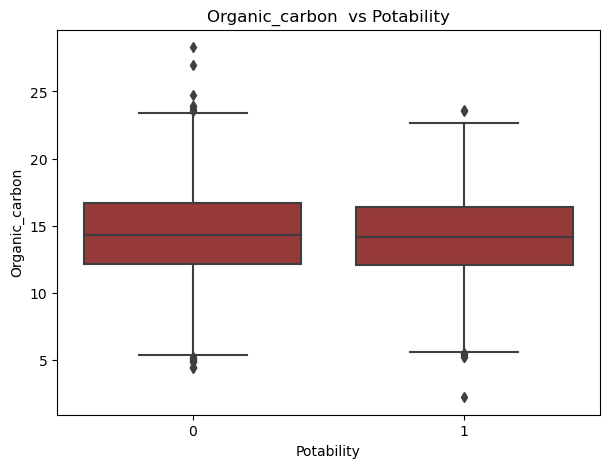

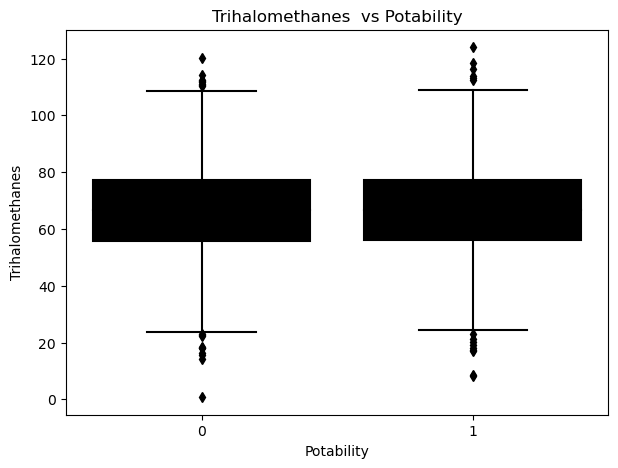

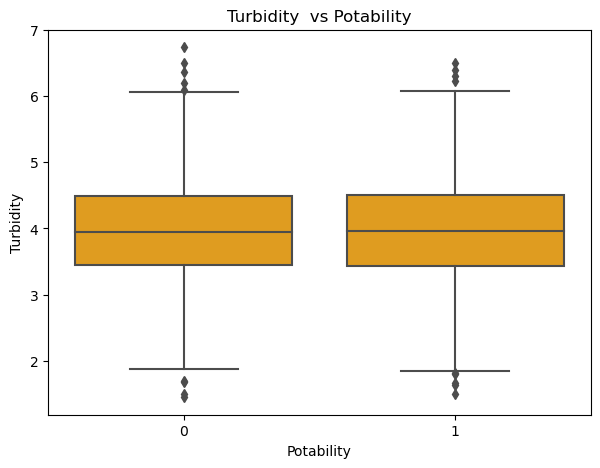

In [54]:
# To check the outliers in the dataset with the help of Boxplot
colors=["red","blue","green","grey","purple","violet","brown","black", "orange"]
for i in  range(len(columns)-1):
    plt.figure(figsize=(7,5))
    sns.boxplot(data=dataframe, x=dataframe["Potability"], y=dataframe[columns[i]], color=colors[i])
    plt.title(f"{columns[i]}  vs Potability")
    plt.show()


# Split the dataset into Train and Test Split

In [55]:
# Lets Split the dataset first
def train_test_split_data(dataframe, target, random_state, test_size):
    
    x_train,y_train,x_test,y_test= train_test_split(dataframe.drop([target], axis=1),
                                                    dataframe[target],
                                                    test_size=test_size,
                                                    random_state=random_state,
                                                    stratify=dataframe[target])
                                     
    return x_train, x_test, y_train,y_test

In [56]:
x_train, y_train, x_test, y_test= train_test_split_data(dataframe,target="Potability", random_state=42, test_size=0.3)

In [57]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2293, 9), (2293,), (983, 9), (983,))

# First delete the outliers from the dataset and then handle the missing values

In [58]:
def Percentile_Capping(columns, x_train, y_train, a, b):
    
    outliers=[]
    for col in columns:
        q1=np.percentile(x_train[col], a)
        q2=np.percentile(x_train[col], b)
    
    for i in range(len(x_train)):
        if x_train[col].iloc[i]>q2 or  x_train[col].iloc[i]<q1:
            outliers.append(i)
            
    outliers=set(outliers)    # to remove the duplicate values in the dataset
    outliers=list(outliers)
            
            
    x_train.drop(x_train.index[outliers], inplace=True)   # remove the outliers from the trainin data
    y_train.drop(y_train.index[outliers], inplace=True)
            
    ratio= round(len(outliers)/len(x_train)*100,2)
            
            
    return x_train, y_train, ratio

In [59]:
x_train, y_train, ratio= Percentile_Capping(x_train.select_dtypes(exclude="object").columns, x_train, y_train, a=2, b=98)

In [60]:
x_train.shape, y_train.shape

((2201, 9), (2201,))

In [61]:
print(f"Ratio of outliers in the dataset:{ratio}")

Ratio of outliers in the dataset:4.18


# Lets handle the missing value in the Training Data

In [62]:
x_train.isna().sum()

ph                 330
Hardness             0
Solids               0
Chloramines          0
Sulfate            527
Conductivity         0
Organic_carbon       0
Trihalomethanes    110
Turbidity            0
dtype: int64

In [63]:
# genereate the random values and then fill the missing values in Ph columns
lower_limit=0
upper_limit=14
missing_values=330

random_numbers= np.random.uniform(lower_limit, upper_limit, missing_values)
x_train["ph"]= x_train["ph"].fillna(pd.Series(random_numbers, index=x_train.index[x_train["ph"].isna()]))

In [64]:
# genereate the random values and then fill the missing values in sulfate columns
lower_limit=129
upper_limit=481
missing_values=527

random_numbers= np.random.uniform(lower_limit, upper_limit, missing_values)
x_train["Sulfate"]= x_train["Sulfate"].fillna(pd.Series(random_numbers, index=x_train.index[x_train["Sulfate"].isna()]))

In [65]:
# genereate the random values and then fill the missing values in Trihalomethanes columns
lower_limit=0.7
upper_limit=124
missing_values=110

random_numbers= np.random.uniform(lower_limit, upper_limit, missing_values)
x_train["Trihalomethanes"]= x_train["Trihalomethanes"].fillna(pd.Series(random_numbers, index=x_train.index[x_train["Trihalomethanes"].isna()]))

# Lets handle the missing value in the Testing Data


In [66]:
x_test.isna().sum()

ph                 147
Hardness             0
Solids               0
Chloramines          0
Sulfate            232
Conductivity         0
Organic_carbon       0
Trihalomethanes     46
Turbidity            0
dtype: int64

In [67]:
lower_limit=0
upper_limit=14
missing_values=147

random_numbers= np.random.uniform(lower_limit, upper_limit, missing_values)
x_test["ph"]= x_test["ph"].fillna(pd.Series(random_numbers, index=x_test.index[x_test["ph"].isna()]))

In [68]:
lower_limit=129
upper_limit=481
missing_values=232

random_numbers= np.random.uniform(lower_limit, upper_limit, missing_values)
x_test["Sulfate"]= x_test["Sulfate"].fillna(pd.Series(random_numbers, index=x_test.index[x_test["Sulfate"].isna()]))

In [69]:
lower_limit=0.7
upper_limit=124
missing_values=46

random_numbers= np.random.uniform(lower_limit, upper_limit, missing_values)
x_test["Trihalomethanes"]= x_test["Trihalomethanes"].fillna(pd.Series(random_numbers, index=x_test.index[x_test["Trihalomethanes"].isna()]))

In [70]:
x_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2018,1.625663,237.083948,35434.280062,7.617649,381.337527,365.032503,13.453872,33.439868,3.825937
2740,6.789821,197.300014,22527.681207,5.166942,399.981755,422.482029,15.916605,47.935105,4.512068
2746,5.636924,159.139410,27283.780655,6.918727,328.907287,317.830981,13.611408,36.335199,3.007138
1468,6.279842,175.890640,11582.505249,7.059985,387.614394,430.322092,15.674785,86.760257,3.278584
1417,6.703487,182.129514,24316.875146,7.009806,341.333952,479.537497,20.088643,53.925045,4.223884


In [71]:
x_test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2137,7.775050,195.178742,22329.740079,6.105130,416.949194,371.615860,10.964183,84.131699,4.699483
775,12.527245,205.088789,27064.418409,7.398379,304.926475,409.501842,18.521792,61.486105,4.599573
1820,6.643027,205.233119,20511.369240,5.908111,313.353813,455.693256,16.021941,52.153472,3.709989
26,3.445062,207.926260,33424.768678,8.782147,384.007006,441.785876,13.805902,30.284597,4.184397
1085,12.147874,190.219168,23094.872394,6.481986,298.356157,414.889130,13.461794,50.895233,2.977047


# Data Preprocessing

In [72]:
columns=x_train.select_dtypes(exclude="object").columns
scaler= MinMaxScaler()
x_train[columns]= scaler.fit_transform(x_train[columns])
x_test[columns]= scaler.transform(x_test[columns])

In [73]:
x_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2018,0.114746,0.687912,0.576514,0.522337,0.716806,0.348460,0.401239,0.265304,0.456780
2740,0.484768,0.543607,0.364605,0.306603,0.769768,0.457526,0.510042,0.382901,0.672457
2746,0.402161,0.405189,0.442694,0.460812,0.567869,0.258850,0.408199,0.288793,0.199400
1468,0.448227,0.465950,0.184900,0.473247,0.734636,0.472410,0.499359,0.697881,0.284726
1417,0.478582,0.488580,0.393981,0.468829,0.603169,0.565843,0.694362,0.431496,0.581870


In [74]:
x_test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2137,0.555362,0.535912,0.361355,0.389191,0.817966,0.360958,0.291245,0.676556,0.731369
775,0.895866,0.571858,0.439092,0.503035,0.499748,0.432883,0.625139,0.492837,0.699963
1820,0.474250,0.572382,0.331500,0.371848,0.523687,0.520576,0.514696,0.417123,0.420333
26,0.245110,0.582151,0.543521,0.624848,0.724389,0.494173,0.416792,0.239706,0.569458
1085,0.868684,0.517923,0.373918,0.422365,0.481084,0.443111,0.401589,0.406916,0.189941


# Lets do the Modelling
> # Ensemble Learning
> # RandomForestClassifier: Finding best parameters using GridSearchCV

RandomForestClassifier(max_features=10, min_samples_split=3, n_estimators=400)
----------------------
Accuracy:[0.6510681586978637]
F1-Score:[0.4330578512396694]
Precision:[0.34203655352480417]
Recall:[0.5900900900900901]
Classification_Report
-----------------------
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       600
           1       0.59      0.34      0.43       383

    accuracy                           0.65       983
   macro avg       0.63      0.60      0.59       983
weighted avg       0.64      0.65      0.63       983

Confusion_Matrix
----------------------


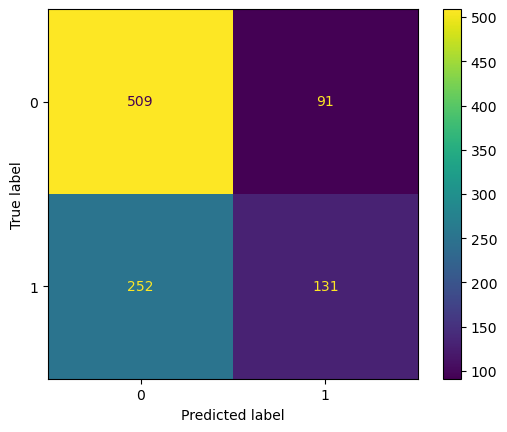

In [36]:
rf=RandomForestClassifier()
hyper_params={"max_features": [1,3,10],
              "min_samples_split":[2,3,10],
              "min_samples_leaf":[1,3,10],
              "n_estimators":[100,300, 400, 500],
              "criterion":["gini"]}

model=GridSearchCV(rf, hyper_params, cv=5, scoring="f1_macro", n_jobs=-1)
model.fit(x_train,y_train)
y_pred= model.predict(x_test)
print(model.best_estimator_)

print("----------------------")

accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]


accuracy_scores.append(accuracy_score(y_pred, y_test))
f1_scores.append(f1_score(y_pred, y_test))
precision_scores.append(precision_score(y_pred, y_test))
recall_scores.append(recall_score(y_pred, y_test))



# Print the Results
print(f"Accuracy:{accuracy_scores}")
print(f"F1-Score:{f1_scores}")
print(f"Precision:{precision_scores}")
print(f"Recall:{recall_scores}")



print("Classification_Report")
print("-----------------------")
print(classification_report(y_test,y_pred))
print("Confusion_Matrix")
print("----------------------")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

> # LightGradientBoostingClassifier 

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
Accuracy:0.6317395727365208
F1-Score:0.3864406779661017
Precision:0.29765013054830286
Recall:0.55072463768115

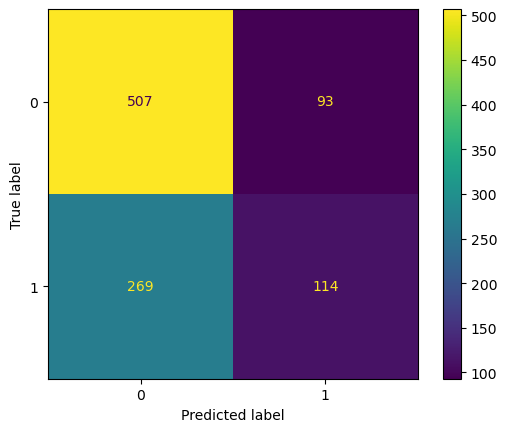

In [33]:
import lightgbm as lgb
hyper_params = {
                 "objective":'binary', 
                 "num_leaves":9,
                 "learning_rate": 0.01, 
                 "n_estimators":1000,
                 "max_bin": 500, 
                 "bagging_fraction": 0.8,
                 "bagging_freq": 4, 
                 "bagging_seed": 8,
                 "feature_fraction_seed": 8,
                 "min_sum_hessian_in_leaf":11,
                 "verbose": 0,
                "random_state": 42
               }

model_lgb= lgb.LGBMClassifier(**hyper_params)
model_lgb.fit(x_train,y_train)
y_pred= model_lgb.predict(x_test)


# Print the Results
print(f"Accuracy:{accuracy_score(y_pred,y_test)}")
print(f"F1-Score:{f1_score(y_pred,y_test)}")
print(f"Precision:{precision_score(y_pred,y_test)}")
print(f"Recall:{recall_score(y_pred,y_test)}")



print("Classification_Report")
print("-----------------------")
print(classification_report(y_test,y_pred))
print("Confusion_Matrix")
print("----------------------")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

> # GradientBoostingClassifier

GradientBoostingClassifier(learning_rate=0.2, max_features=6,
                           min_samples_split=10, n_estimators=400)
----------------------
Accuracy:[0.5991861648016277]
F1-Score:[0.4012158054711246]
Precision:[0.34464751958224543]
Recall:[0.48]
Classification_Report
-----------------------
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       600
           1       0.48      0.34      0.40       383

    accuracy                           0.60       983
   macro avg       0.56      0.55      0.55       983
weighted avg       0.58      0.60      0.58       983

Confusion_Matrix
----------------------


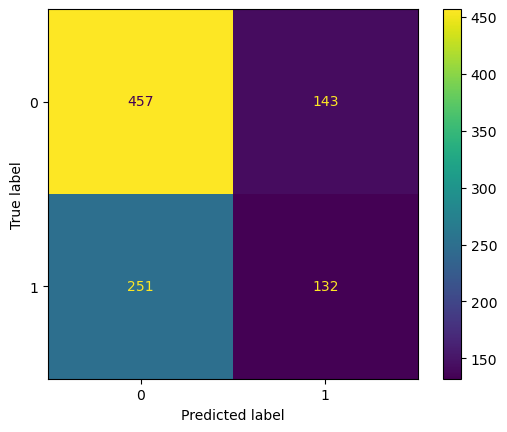

In [34]:
gbd= GradientBoostingClassifier()
hyper_params = { "learning_rate": [0.05, 0.1, 0.2,0.01],
                 "min_samples_split": [2,3,10,12,12],
                 "min_samples_leaf": [1,3,10],
                "n_estimators":[100,200,300,400,500],
                "max_features":[1,4,6,8]
                 
                      }

model=GridSearchCV(gbd, hyper_params, cv=5, scoring="f1_macro", n_jobs=-1)
model.fit(x_train,y_train)
y_pred= model.predict(x_test)
print(model.best_estimator_)

print("----------------------")

accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]


accuracy_scores.append(accuracy_score(y_pred, y_test))
f1_scores.append(f1_score(y_pred, y_test))
precision_scores.append(precision_score(y_pred, y_test))
recall_scores.append(recall_score(y_pred, y_test))



# Print the Results
print(f"Accuracy:{accuracy_scores}")
print(f"F1-Score:{f1_scores}")
print(f"Precision:{precision_scores}")
print(f"Recall:{recall_scores}")



print("Classification_Report")
print("-----------------------")
print(classification_report(y_test,y_pred))
print("Confusion_Matrix")
print("----------------------")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

> # catboost

0:	learn: 0.6667786	test: 0.6690652	best: 0.6690652 (0)	total: 2.51ms	remaining: 22.6ms
1:	learn: 0.6576362	test: 0.6653248	best: 0.6653248 (1)	total: 4.56ms	remaining: 18.3ms
2:	learn: 0.6522357	test: 0.6638101	best: 0.6638101 (2)	total: 6.07ms	remaining: 14.2ms
3:	learn: 0.6506185	test: 0.6619821	best: 0.6619821 (3)	total: 7.55ms	remaining: 11.3ms
4:	learn: 0.6494935	test: 0.6638800	best: 0.6619821 (3)	total: 9.04ms	remaining: 9.04ms
5:	learn: 0.6461600	test: 0.6605432	best: 0.6605432 (5)	total: 10.9ms	remaining: 7.27ms
6:	learn: 0.6422943	test: 0.6593471	best: 0.6593471 (6)	total: 12.4ms	remaining: 5.32ms
7:	learn: 0.6385978	test: 0.6617468	best: 0.6593471 (6)	total: 14.3ms	remaining: 3.58ms
8:	learn: 0.6359540	test: 0.6612652	best: 0.6593471 (6)	total: 16.4ms	remaining: 1.82ms
9:	learn: 0.6339385	test: 0.6630685	best: 0.6593471 (6)	total: 17.4ms	remaining: 0us

bestTest = 0.6593470741
bestIteration = 6

Shrink model to first 7 iterations.
----------------------
Accuracy:[0.60630722

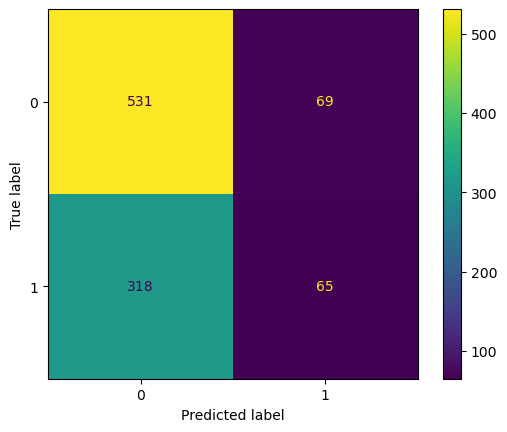

In [103]:
from catboost import Pool, CatBoostClassifier

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=10,
                           learning_rate=1,
                           depth=2,
                           loss_function='Logloss')
# Fit model
model.fit(x_train, y_train, eval_set=(x_test, y_test), verbose=1)
# Get predicted classes
y_pred = model.predict(x_test)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(x_test)
# Get predicted RawFormulaVal
preds_raw = model.predict(x_test, 
                          prediction_type='RawFormulaVal')


print("----------------------")

accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]


accuracy_scores.append(accuracy_score(y_pred, y_test))
f1_scores.append(f1_score(y_pred, y_test))
precision_scores.append(precision_score(y_pred, y_test))
recall_scores.append(recall_score(y_pred, y_test))



# Print the Results
print(f"Accuracy:{accuracy_scores}")
print(f"F1-Score:{f1_scores}")
print(f"Precision:{precision_scores}")
print(f"Recall:{recall_scores}")



print("Classification_Report")
print("-----------------------")
print(classification_report(y_test,y_pred))
print("Confusion_Matrix")
print("----------------------")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [1]:
# import shap

# shap.initjs()

In [ ]:
# !conda install numpy=1.25.0

In [ ]:
# import numpy as np
# print(np.__version__)
